<a href="https://colab.research.google.com/github/puritym8/Python-Data-Analysis/blob/main/Food_carbon_footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [5]:
df.shape

(1430, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


**The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa. Use this image**

In [8]:
east_africa = df[df.country.isin(['Kenya', 'Uganda', 'Tanzania', 'Rwanda','Ethiopia'])].reset_index()
east_africa.head()

,index,country,food_category,consumption,co2_emmission
0,902,Kenya,Pork,0.29,1.03
1,903,Kenya,Poultry,0.47,0.50
2,904,Kenya,Beef,9.54,294.38
3,905,Kenya,Lamb & Goat,1.86,65.14
4,906,Kenya,Fish,4.27,6.82


In [9]:
east_africa.shape
east_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          55 non-null     int64  
 1   country        55 non-null     object 
 2   food_category  55 non-null     object 
 3   consumption    55 non-null     float64
 4   co2_emmission  55 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.3+ KB


In [10]:
emmissions_df = east_africa.groupby('food_category')['co2_emmission'].mean().sort_values(ascending=True).reset_index()

emmissions_df

,food_category,co2_emmission
0,Soybeans,0.236
1,Eggs,0.718
2,Poultry,1.250
3,Pork,3.370
4,Wheat and Wheat Products,3.940
5,Nuts inc. Peanut Butter,4.650
6,Fish,8.428
7,Rice,12.680
8,Lamb & Goat,55.262
9,Milk - inc. cheese,63.754


In [12]:
emmissions_df['food_category']


0                     Soybeans
1                         Eggs
2                      Poultry
3                         Pork
4     Wheat and Wheat Products
5      Nuts inc. Peanut Butter
6                         Fish
7                         Rice
8                  Lamb & Goat
9           Milk - inc. cheese
10                        Beef
Name: food_category, dtype: object

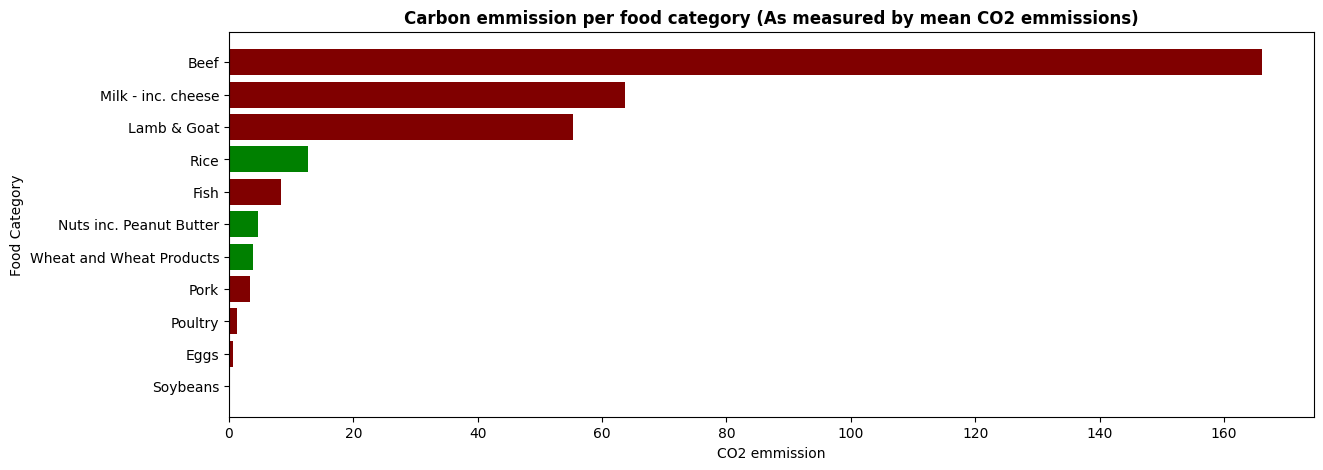

In [14]:
food = emmissions_df['food_category']
emmission = emmissions_df['co2_emmission']
colors=['green','maroon','maroon','maroon','green','green','maroon','green','maroon','maroon','maroon']

plt.figure(figsize=(14,5))
plt.barh(food,emmission, color=colors)

plt.title('Carbon emmission per food category (As measured by mean CO2 emmissions)', fontsize=12, fontweight='bold')
plt.xlabel('CO2 emmission')
plt.ylabel("Food Category")
plt.show()


When examining the average CO2 emissions per person by food category among Kenya, Uganda, Tanzania, Rwanda, and Ethiopia, there are some interesting trends.
Diets heavy in animal products such as meat and dairy tend to have higher carbon footprints compared to plant-based diets.
This is due to the significant resources required for livestock farming, including feed production and land use, which contribute to greenhouse gas emissions; thus leading to high CO2 emmissions.

**Disparity between Consumption and Emissions: **bold text**
**


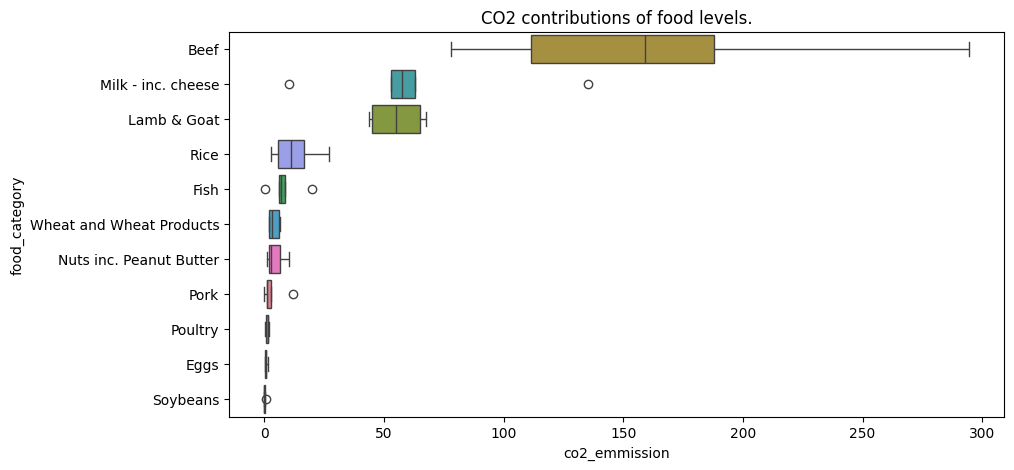

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=east_africa, x='co2_emmission',y='food_category',
            hue='food_category', legend=False, palette='husl',
            order=['Beef','Milk - inc. cheese','Lamb & Goat','Rice',
                   'Fish','Wheat and Wheat Products', 'Nuts inc. Peanut Butter',
                   'Pork','Poultry','Eggs','Soybeans',])
plt.title('CO2 contributions of food levels.')
plt.show()

One notable observation is the marked difference between consumption and emissions, especially in beef production. Despite relatively lower consumption levels compared to other food categories, beef production significantly contributes to CO2 emissions due to its resource-intensive nature. This highlights the inefficiency and environmental cost associated with meat production, urging for more sustainable alternatives.

**Top 10 Countries with Highest Emissions:**


In [17]:
high_emmission = df.groupby('country')['co2_emmission'].sum().sort_values(ascending=False).head(10).reset_index()

high_emmission['country']


0      Argentina
1      Australia
2        Albania
3    New Zealand
4        Iceland
5            USA
6        Uruguay
7         Brazil
8     Luxembourg
9     Kazakhstan
Name: country, dtype: object

In [22]:
high_country=('Argentina','Australia','Albania','New Zealand','Iceland','USA','Uruguay','Brazil','Luxembourg','Kazakhstan')

country=df[df['country'].isin(high_country)]
country.head(30)

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
5,Argentina,Eggs,11.39,10.46
6,Argentina,Milk - inc. cheese,195.08,277.87
7,Argentina,Wheat and Wheat Products,103.11,19.66
8,Argentina,Rice,8.77,11.22
9,Argentina,Soybeans,0.00,0.00


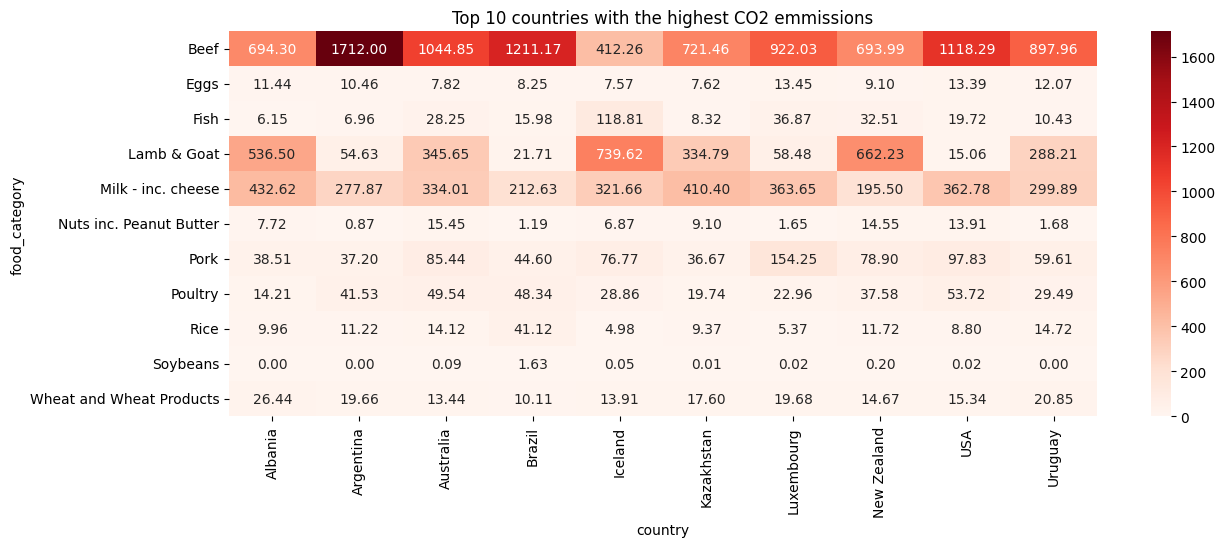

In [24]:
plt.figure(figsize=(14,5))
data=country.pivot_table(index='food_category', columns='country', values='co2_emmission')
sns.heatmap(data, cmap='Reds',annot=True, fmt='.2f')
plt.title('Top 10 countries with the highest CO2 emmissions')

plt.show()

Industrialized nations such as Argentina and Brazil feature prominently on the list, reflecting the significant carbon footprint associated with well-off  lifestyles and consumption patterns. This underscores the urgent need for global cooperation and policy interventions to address the climate crisis and transition towards a more sustainable food system.